In [1]:
import pandas as pd
crime_station=pd.read_csv('../data/02_crime_station.csv', index_col=0, encoding='UTF-8')
# week2에서 정리한 지역별 5대 범죄 현황 파일을 불러와 crime_station변수에 저장. colums의 index는 col[0]값으로 한다.
crime_station.head()
# 파일의 상위 5줄 출력

IOError: File ../data/02_crime_station.csv does not exist

In [5]:
import numpy as np #numpy 모듈 불러오기
crime_gu=pd.pivot_table(crime_station, index='구', aggfunc=np.sum)
# crime station변수의 row_index는 '구'열의 값으로 설정하고 피벗테이블의 내용은 구별 합계값으로 정렬하여 crime_gu 변수에 저장
del crime_gu['lat'] # lat 열 삭제
del crime_gu['lng'] # lng 열 삭제
crime_gu.head() # crime_gu 상위 5줄 출력

,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생
구,,,,,,,,,,
강남구,413.0,516.0,42.0,39.0,5.0,5.0,1918.0,3587.0,3527.0,4002.0
강동구,152.0,160.0,13.0,14.0,5.0,4.0,902.0,1754.0,2201.0,2530.0
강북구,159.0,217.0,4.0,5.0,6.0,7.0,672.0,1222.0,2482.0,2778.0
강서구,239.0,275.0,10.0,10.0,10.0,9.0,1070.0,1952.0,2768.0,3204.0
관악구,264.0,322.0,10.0,12.0,7.0,6.0,937.0,2103.0,2707.0,3235.0


In [6]:
crime_gu['살인발생'].sort_values(ascending=False).head()
#살인발생 column을 내림차순으로 정렬

구
영등포구    13.0
강서구      9.0
송파구      9.0
구로구      9.0
중랑구      8.0
Name: 살인발생, dtype: float64

In [7]:
crime_gu[['강도검거','살인검거']].div(crime_gu['강도발생'], axis=0)
#'강도검거', '살인검거' 열 값을 '강도 발생' 값으로 나눈다. axis=0은 열방향 계산
#'강도검거[0]'/'강도발생[0]' , '강도검거[1]'/'강도발생[1]' 

,강도검거,살인검거
구,,
강남구,1.076923,0.128205
강동구,0.928571,0.357143
강북구,0.800000,1.200000
강서구,1.000000,1.000000
관악구,0.833333,0.583333
광진구,0.545455,0.363636
구로구,1.300000,0.900000
금천구,1.000000,0.857143
노원구,1.500000,1.000000


In [7]:
#나눗셈 한번에 실행하기

num=['강간검거','강도검거','살인검거','절도검거','폭력검거'] #column을 num의 변수로 저장
den=['강간발생','강도발생','살인발생','절도발생','폭력발생'] #각 column을 ben의 변수로 저장

crime_gu[num].div(crime_gu[den].values)
#강간 검거/강간발생, 강도검거/강도발생....

,강간검거,강도검거,살인검거,절도검거,폭력검거
구,,,,,
강남구,0.800388,1.076923,1.000000,0.534709,0.881309
강동구,0.950000,0.928571,1.250000,0.514253,0.869960
강북구,0.732719,0.800000,0.857143,0.549918,0.893449
강서구,0.869091,1.000000,1.111111,0.548156,0.863920
관악구,0.819876,0.833333,1.166667,0.445554,0.836785
광진구,0.838710,0.545455,1.000000,0.400986,0.840719
구로구,0.663004,1.300000,1.000000,0.450785,0.847029
금천구,0.817143,1.000000,1.000000,0.517405,0.887369
노원구,0.893082,1.500000,1.200000,0.398492,0.844197


In [8]:
# 위의 계산을 dataframe에 추가
target=['강간검거율','강도검거율','살인검거율','절도검거율','폭력검거율'] #target변수 생성
num=['강간검거','강도검거','살인검거','절도검거','폭력검거'] 
den=['강간발생','강도발생','살인발생','절도발생','폭력발생']

crime_gu[target]=crime_gu[num].div(crime_gu[den].values)*100
#강간 검거율=(강간검거/강간발생) *100 , xx%로 표현
crime_gu.head()

,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구,,,,,,,,,,,,,,,
강남구,413.0,516.0,42.0,39.0,5.0,5.0,1918.0,3587.0,3527.0,4002.0,80.038760,107.692308,100.000000,53.470867,88.130935
강동구,152.0,160.0,13.0,14.0,5.0,4.0,902.0,1754.0,2201.0,2530.0,95.000000,92.857143,125.000000,51.425314,86.996047
강북구,159.0,217.0,4.0,5.0,6.0,7.0,672.0,1222.0,2482.0,2778.0,73.271889,80.000000,85.714286,54.991817,89.344852
강서구,239.0,275.0,10.0,10.0,10.0,9.0,1070.0,1952.0,2768.0,3204.0,86.909091,100.000000,111.111111,54.815574,86.392010
관악구,264.0,322.0,10.0,12.0,7.0,6.0,937.0,2103.0,2707.0,3235.0,81.987578,83.333333,116.666667,44.555397,83.678516


In [9]:
crime_gu=crime_gu.drop(columns=num)
# crime_gu 변수에서 num 변수에 해당하는 검거 관련 열 삭제
crime_gu.head()

,강간발생,강도발생,살인발생,절도발생,폭력발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구,,,,,,,,,,
강남구,516.0,39.0,5.0,3587.0,4002.0,80.038760,107.692308,100.000000,53.470867,88.130935
강동구,160.0,14.0,4.0,1754.0,2530.0,95.000000,92.857143,125.000000,51.425314,86.996047
강북구,217.0,5.0,7.0,1222.0,2778.0,73.271889,80.000000,85.714286,54.991817,89.344852
강서구,275.0,10.0,9.0,1952.0,3204.0,86.909091,100.000000,111.111111,54.815574,86.392010
관악구,322.0,12.0,6.0,2103.0,3235.0,81.987578,83.333333,116.666667,44.555397,83.678516


In [10]:
crime_gu[target]>100
#검거율로 추가한 target 값이 100보다 큰 케이스를 찾기

,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구,,,,,
강남구,False,True,False,False,False
강동구,False,False,True,False,False
강북구,False,False,False,False,False
강서구,False,False,True,False,False
관악구,False,False,True,False,False
광진구,False,False,False,False,False
구로구,False,True,False,False,False
금천구,False,False,False,False,False
노원구,False,True,True,False,False


In [11]:
crime_gu[crime_gu[target]>100]=100
# 검거율 부분에 100이 넘는 값이 있다면 100으로 저장
crime_gu

,강간발생,강도발생,살인발생,절도발생,폭력발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구,,,,,,,,,,
강남구,516.0,39.0,5.0,3587.0,4002.0,80.038760,100.000000,100.000000,53.470867,88.130935
강동구,160.0,14.0,4.0,1754.0,2530.0,95.000000,92.857143,100.000000,51.425314,86.996047
강북구,217.0,5.0,7.0,1222.0,2778.0,73.271889,80.000000,85.714286,54.991817,89.344852
강서구,275.0,10.0,9.0,1952.0,3204.0,86.909091,100.000000,100.000000,54.815574,86.392010
관악구,322.0,12.0,6.0,2103.0,3235.0,81.987578,83.333333,100.000000,44.555397,83.678516
광진구,279.0,11.0,4.0,2636.0,2392.0,83.870968,54.545455,100.000000,40.098634,84.071906
구로구,273.0,10.0,9.0,1910.0,3164.0,66.300366,100.000000,100.000000,45.078534,84.702908
금천구,175.0,7.0,6.0,1264.0,2193.0,81.714286,100.000000,100.000000,51.740506,88.736890
노원구,159.0,6.0,5.0,1857.0,2516.0,89.308176,100.000000,100.000000,39.849219,84.419714


In [12]:
crime_gu.rename(columns={'강간발생':'강간','강도발생':'강도','살인발생':'살인','절도발생':'절도','폭력발생':'폭력'}, inplace=True)
#crime_gu 변수의 columns index값을 '강간발생'은 '강간', '강고발생'은 '강도' 이런식으로 변경
crime_gu.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구,,,,,,,,,,
강남구,516.0,39.0,5.0,3587.0,4002.0,80.038760,100.000000,100.000000,53.470867,88.130935
강동구,160.0,14.0,4.0,1754.0,2530.0,95.000000,92.857143,100.000000,51.425314,86.996047
강북구,217.0,5.0,7.0,1222.0,2778.0,73.271889,80.000000,85.714286,54.991817,89.344852
강서구,275.0,10.0,9.0,1952.0,3204.0,86.909091,100.000000,100.000000,54.815574,86.392010
관악구,322.0,12.0,6.0,2103.0,3235.0,81.987578,83.333333,100.000000,44.555397,83.678516


In [13]:
#같은 기준으로 판단하기 위해 정규화
col=['살인','강도','강간','절도','폭력'] # '살인','강도','강간','절도','폭력' columns을 col변수에 저장
crime_gu_norm=crime_gu[col]/crime_gu[col].max() # '살인'columns의 최대값으로 같은 columns 값을 나누어 crime_gu_norm에 저장
crime_gu_norm.head()

,살인,강도,강간,절도,폭력
구,,,,,
강남구,0.384615,1.000000,1.000000,1.000000,1.000000
강동구,0.307692,0.358974,0.310078,0.488988,0.632184
강북구,0.538462,0.128205,0.420543,0.340675,0.694153
강서구,0.692308,0.256410,0.532946,0.544187,0.800600
관악구,0.461538,0.307692,0.624031,0.586284,0.808346


In [25]:
crime_gu_norm[col]

,살인,강도,강간,절도,폭력
구,,,,,
강남구,0.384615,1.000000,1.000000,1.000000,1.000000
강동구,0.307692,0.358974,0.310078,0.488988,0.632184
강북구,0.538462,0.128205,0.420543,0.340675,0.694153
강서구,0.692308,0.256410,0.532946,0.544187,0.800600
관악구,0.461538,0.307692,0.624031,0.586284,0.808346
광진구,0.307692,0.282051,0.540698,0.734876,0.597701
구로구,0.692308,0.256410,0.529070,0.532478,0.790605
금천구,0.461538,0.179487,0.339147,0.352384,0.547976
노원구,0.384615,0.153846,0.308140,0.517703,0.628686


In [17]:
col2=['강간검거율','강도검거율','살인검거율','절도검거율','폭력검거율']
crime_gu_norm[col2]=crime_gu[col2]
#crime_gu_norm 변수에 col2 값의 열을 추가하는데 그 내용은 crime_gu[col2]로 한다.
crime_gu_norm.head()

,살인,강도,강간,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구,,,,,,,,,,
강남구,0.384615,1.000000,1.000000,1.000000,1.000000,80.038760,100.000000,100.000000,53.470867,88.130935
강동구,0.307692,0.358974,0.310078,0.488988,0.632184,95.000000,92.857143,100.000000,51.425314,86.996047
강북구,0.538462,0.128205,0.420543,0.340675,0.694153,73.271889,80.000000,85.714286,54.991817,89.344852
강서구,0.692308,0.256410,0.532946,0.544187,0.800600,86.909091,100.000000,100.000000,54.815574,86.392010
관악구,0.461538,0.307692,0.624031,0.586284,0.808346,81.987578,83.333333,100.000000,44.555397,83.678516


In [23]:
crime_gu_norm[col2]

,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구,,,,,
강남구,80.038760,100.000000,100.000000,53.470867,88.130935
강동구,95.000000,92.857143,100.000000,51.425314,86.996047
강북구,73.271889,80.000000,85.714286,54.991817,89.344852
강서구,86.909091,100.000000,100.000000,54.815574,86.392010
관악구,81.987578,83.333333,100.000000,44.555397,83.678516
광진구,83.870968,54.545455,100.000000,40.098634,84.071906
구로구,66.300366,100.000000,100.000000,45.078534,84.702908
금천구,81.714286,100.000000,100.000000,51.740506,88.736890
노원구,89.308176,100.000000,100.000000,39.849219,84.419714


In [18]:
len(crime_gu_norm.columns)

10

In [26]:
POP_Seoul=pd.read_csv('../data/01.POP_result.csv', index_col=1, encoding='UTF-8')
#data폴더의 csv파일 불러오기. column의 index값은 col[1]값으로 함.
POP_Seoul.head()

,Unnamed: 0,인구수,남성,여성,내국인,남성내국인,여성내국인,외국인,남성외국인,여성외국인,세대당인구,고령자,외국인비율,고령비율,여성비율
구,,,,,,,,,,,,,,,
종로구,1,164640,80173,84467,155109,76155,78954,9531,4018,5513,2.11,26034,0.057890,0.158127,0.513041
중구,2,134174,66064,68110,125332,62011,63321,8842,4053,4789,2.08,21249,0.065900,0.158369,0.507624
용산구,3,243922,119056,124866,228960,110838,118122,14962,8218,6744,2.14,36727,0.061339,0.150569,0.511910
성동구,4,312933,154253,158680,304879,150523,154356,8054,3730,4324,2.30,40902,0.025737,0.130705,0.507073
광진구,5,372414,180737,191677,357743,174534,183209,14671,6203,8468,2.23,43579,0.039394,0.117018,0.514688


In [27]:
crime_gu_norm[['인구수']]=POP_Seoul[['인구수']]
#POP_Seoul파일의 인구수 열의 내용을 crime_gu_norm의 인구수 열로 추가
#index순서와 상관없이 index내용이 같다면 알아서 값이 배치
crime_gu_norm.head()

,살인,강도,강간,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수
구,,,,,,,,,,,
강남구,0.384615,1.000000,1.000000,1.000000,1.000000,80.038760,100.000000,100.000000,53.470867,88.130935,565731
강동구,0.307692,0.358974,0.310078,0.488988,0.632184,95.000000,92.857143,100.000000,51.425314,86.996047,446760
강북구,0.538462,0.128205,0.420543,0.340675,0.694153,73.271889,80.000000,85.714286,54.991817,89.344852,329042
강서구,0.692308,0.256410,0.532946,0.544187,0.800600,86.909091,100.000000,100.000000,54.815574,86.392010,607877
관악구,0.461538,0.307692,0.624031,0.586284,0.808346,81.987578,83.333333,100.000000,44.555397,83.678516,522849


In [28]:
col=['강간','강도','살인','절도','폭력']
#col변수에 '강간', '강도','살인','절도','폭력' 열을 저장
crime_gu_norm['범죄']=np.mean(crime_gu_norm[col],axis=1)
#crime_gu_norm 변수에'범죄'열을 추가하고 col변수에 대해서 행방향으로 강도[0], 강간[0], 살인[0], 절도[0],폭력[0] 5개의 평균값을 저장
#axis=1 행방향의 계산 진행
crime_gu_norm.head()

,살인,강도,강간,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,범죄
구,,,,,,,,,,,,
강남구,0.384615,1.000000,1.000000,1.000000,1.000000,80.038760,100.000000,100.000000,53.470867,88.130935,565731,0.876923
강동구,0.307692,0.358974,0.310078,0.488988,0.632184,95.000000,92.857143,100.000000,51.425314,86.996047,446760,0.419583
강북구,0.538462,0.128205,0.420543,0.340675,0.694153,73.271889,80.000000,85.714286,54.991817,89.344852,329042,0.424407
강서구,0.692308,0.256410,0.532946,0.544187,0.800600,86.909091,100.000000,100.000000,54.815574,86.392010,607877,0.565290
관악구,0.461538,0.307692,0.624031,0.586284,0.808346,81.987578,83.333333,100.000000,44.555397,83.678516,522849,0.557578


In [29]:
col=['강간검거율','강도검거율','살인검거율','절도검거율','폭력검거율']
crime_gu_norm['검거']=np.mean(crime_gu_norm[col],axis=1)
#crime_gu_norm 변수에'범죄'열을 추가하고 col변수에 대해서 행방향으로 --검거율[0]에 해당하는 5개의 평균값을 저장
crime_gu_norm.head()

,살인,강도,강간,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,범죄,검거
구,,,,,,,,,,,,,
강남구,0.384615,1.000000,1.000000,1.000000,1.000000,80.038760,100.000000,100.000000,53.470867,88.130935,565731,0.876923,84.328112
강동구,0.307692,0.358974,0.310078,0.488988,0.632184,95.000000,92.857143,100.000000,51.425314,86.996047,446760,0.419583,85.255701
강북구,0.538462,0.128205,0.420543,0.340675,0.694153,73.271889,80.000000,85.714286,54.991817,89.344852,329042,0.424407,76.664569
강서구,0.692308,0.256410,0.532946,0.544187,0.800600,86.909091,100.000000,100.000000,54.815574,86.392010,607877,0.565290,85.623335
관악구,0.461538,0.307692,0.624031,0.586284,0.808346,81.987578,83.333333,100.000000,44.555397,83.678516,522849,0.557578,78.710965


In [46]:
#그래프 그리기
import matplotlib.pyplot as plt # 그래프를 그리기 위해 matplotlib 모듈 불러오기
import seaborn as sns # matplotlib를 기초로 한 통계그래픽을 제공하는 모듈
%matplotlib inline 
# 창내에 그래프결과 삽입

In [32]:
x=np.linspace(0,14,100) # 0~14사이에 100등분한 값을 생성
y1=np.sin(x) # 
y2=2*np.sin(x+0.5)
y3=3*np.sin(x+1.0)
y4=4*np.sin(x+1.5)

''

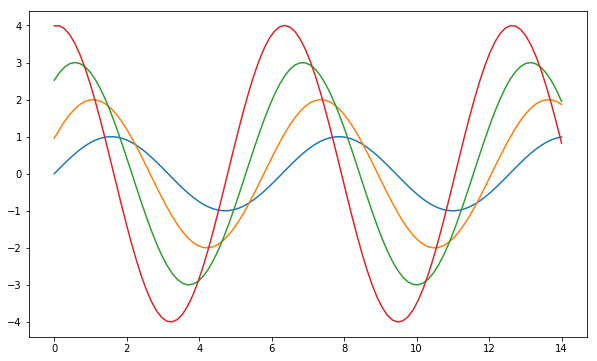

In [34]:
plt.figure(figsize=(10,6)) #그래프 그리기 사이즈 10:6
plt.plot(x,y1, x,y2, x,y3, x,y4) # 위에 설정한 sin그래프 (x,y1) (x,y2) (x,y3) (x,y4)
plt.show # 그래프 출력
;

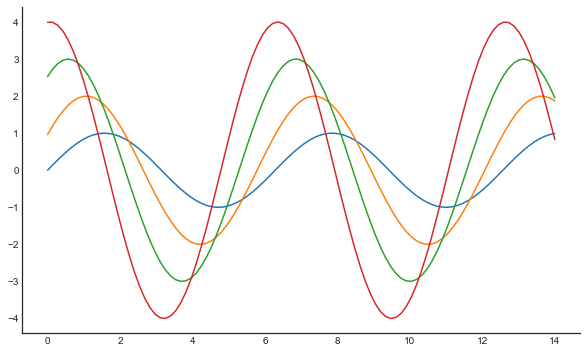

''

In [39]:
sns.set_style("white") # 테두리 스타일을 흰색으로
plt.figure(figsize=(10,6))
plt.plot(x,y1, x,y2, x,y3, x,y4)
sns.despine();
plt.show()
;

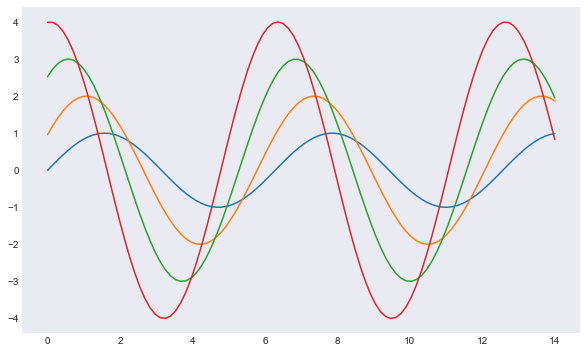

In [40]:
sns.set_style("dark") # 배경 어둡게
plt.figure(figsize=(10,6))
plt.plot(x,y1, x,y2, x,y3, x,y4)
plt.show()

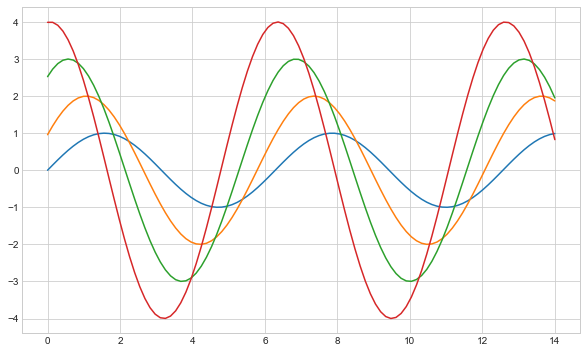

In [41]:
sns.set_style("whitegrid") # 흰색 눈금선
plt.figure(figsize=(10,6))
plt.plot(x,y1, x,y2, x,y3, x,y4)
plt.show()

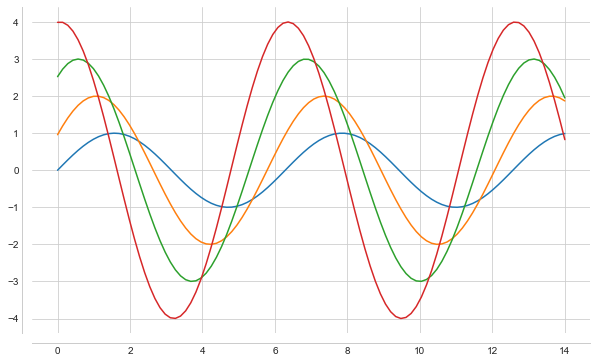

In [44]:
plt.figure(figsize=(10,6))
plt.plot(x,y1, x,y2, x,y3, x,y4)
sns.despine(offset=10) # 원점이 이격거리
plt.show()

In [47]:
tips=sns.load_dataset("tips") #seaborn모듈의 예시 dataset 'tips불러오기'
tips.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


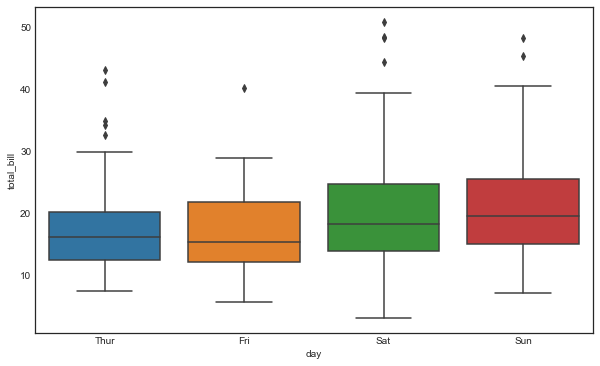

In [36]:
plt.figure(figsize=(10,6))
sns.boxplot(x='day', y='total_bill',data=tips); # tips자료를 가지고 boxplot 그래프를 그린다. x축 값은 day, y축 값은 total bill
plt.show()

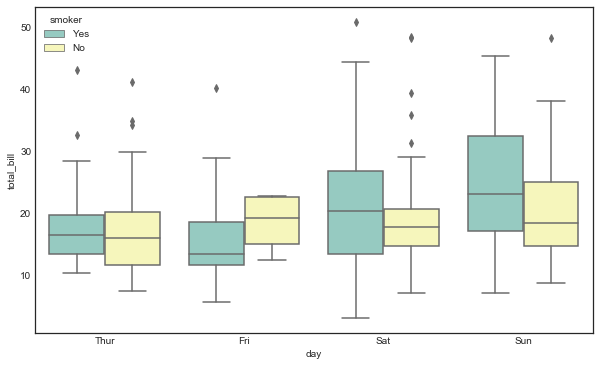

In [38]:
plt.figure(figsize=(10,6))
sns.boxplot(x='day', y='total_bill', hue='smoker',data=tips, palette='Set3'); 
# hue(분류기준)-흡연유무로 data분리하여 그래프 그리기. palette는 여러가지 색 구성 중 하나. 수업 자료 참고
plt.show()

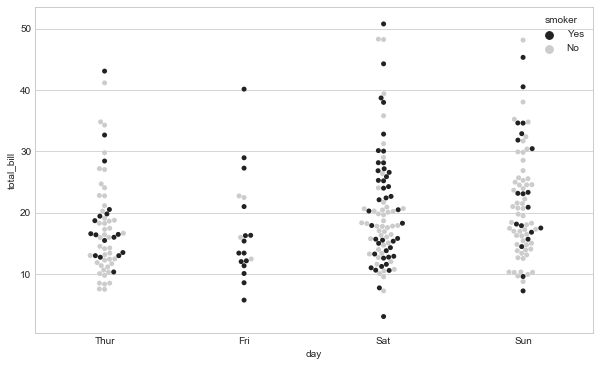

In [49]:
plt.figure(figsize=(10,6))
sns.swarmplot(x='day', y='total_bill', hue='smoker',data=tips, color='.8'); 
#swarmplot 자료의 결과를 겹치지 않게  옆으로 퍼져 scatterplot처럼 표현
#color의 숫자가 클수록 흡연유무차이 눈에 띄게 나타나. 구분 정도
plt.show()

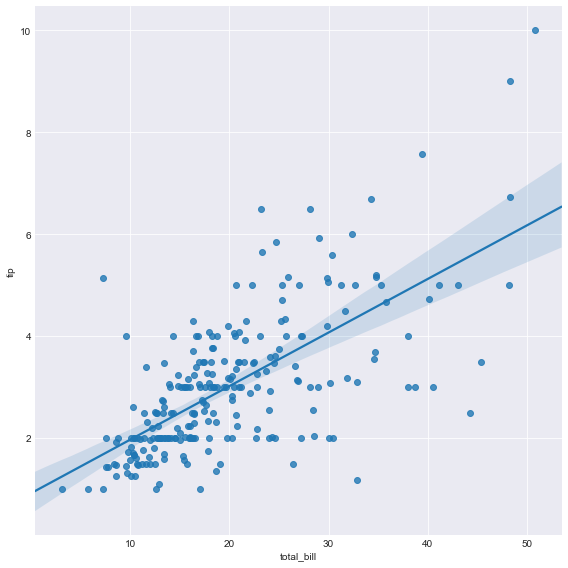

In [52]:
sns.set_style("darkgrid") #그래프 배경 어두운배경에 눈금선
sns.lmplot(x='total_bill', y='tip', data=tips, size=8);
#lmplot은 회귀 직선과 유효범위 보여줌. 
#size는 보여지는 그래프의 크기

plt.show()

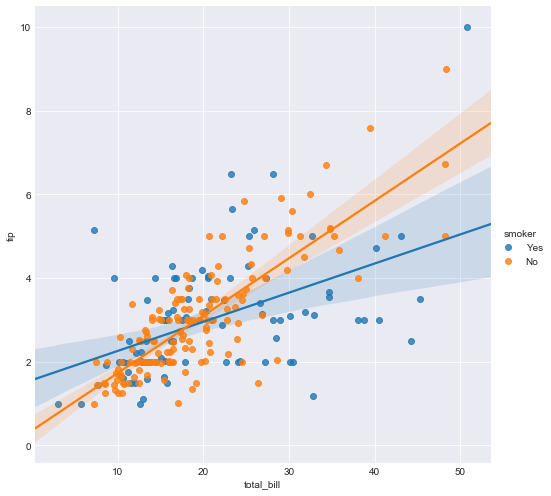

In [56]:
sns.set_style("darkgrid")
sns.lmplot(x='total_bill', y='tip', hue="smoker", data=tips, size=7);
plt.show()

In [54]:
flights=sns.load_dataset('flights') # seaborn에 내장된 dataset flights 불러오기
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [55]:
flights=flights.pivot("month","year","passengers")
# dataset을 month, year에 따른 passengers를 피벗테이블로 구성
flights.head(5)

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


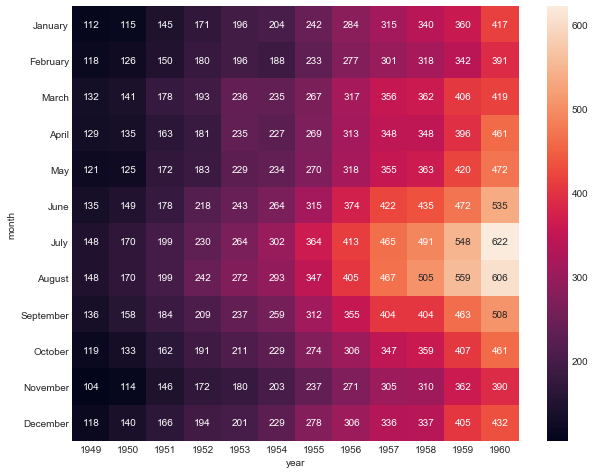

In [56]:
plt.figure(figsize=(10,8))
sns.heatmap(flights, annot=True, fmt='d')
# flights 변수를 히트맵으로 구성. annot(data 보여질지 여부), fmt(data type) d(정수형)
plt.show()

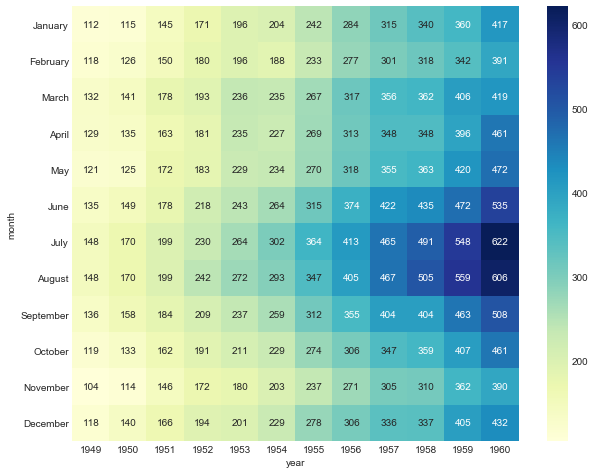

In [57]:
plt.figure(figsize=(10,8))
sns.heatmap(flights, annot=True, fmt='d', cmap='YlGnBu') # cmap 히트맵의 색상. 다른 케이스 자료 참고
plt.show()

In [58]:
#그래프에서 한글이 깨지지 않도록 하는 코드
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus']=False

f_path="c:/windows/Fonts/malgun.ttf"
font_name=font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)

In [69]:
crime_gu_norm.head()

,살인,강도,강간,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,범죄,검거
구,,,,,,,,,,,,,
강남구,0.384615,1.000000,1.000000,1.000000,1.000000,80.038760,100.000000,100.000000,53.470867,88.130935,565731,0.876923,84.328112
강동구,0.307692,0.358974,0.310078,0.488988,0.632184,95.000000,92.857143,100.000000,51.425314,86.996047,446760,0.419583,85.255701
강북구,0.538462,0.128205,0.420543,0.340675,0.694153,73.271889,80.000000,85.714286,54.991817,89.344852,329042,0.424407,76.664569
강서구,0.692308,0.256410,0.532946,0.544187,0.800600,86.909091,100.000000,100.000000,54.815574,86.392010,607877,0.565290,85.623335
관악구,0.461538,0.307692,0.624031,0.586284,0.808346,81.987578,83.333333,100.000000,44.555397,83.678516,522849,0.557578,78.710965


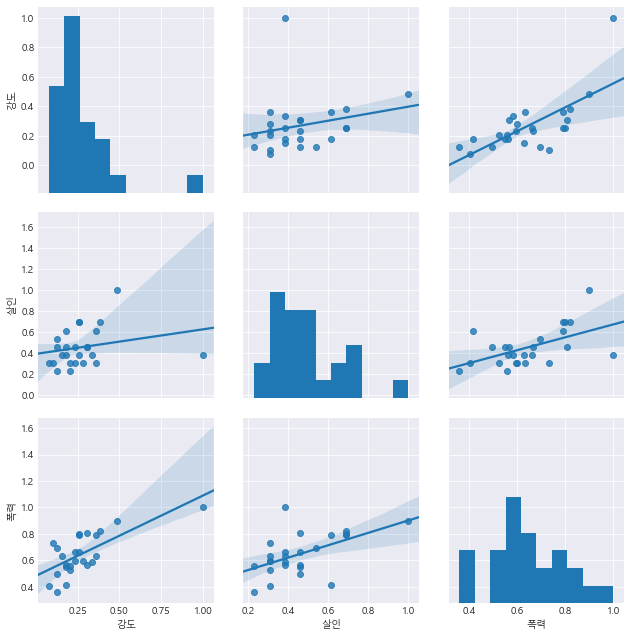

In [60]:
sns.pairplot(crime_gu_norm, vars=['강도','살인','폭력'], kind='reg', size=3);
#각 집합의 조합에 대해 히스토그램과 스캐터 플롯
#column별 데이터에 대한 상관관계나 분류적 특성
#kind는 히스토그램을 제외한 위치에 변수간의 관계를 회귀직선으로 보여줄것을 의미

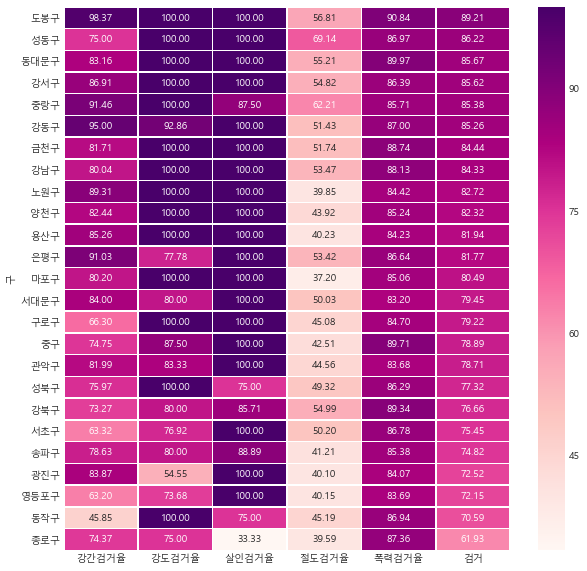

In [77]:
target_col=['강간검거율','강도검거율','살인검거율','절도검거율','폭력검거율','검거']
# target_col변수의 값은 문자열 '검거율'과 '검거'
crime_gu_norm_sort = crime_gu_norm.sort_values(by='검거', ascending=False)
#crime_gu_norm_sort변수는 crime_gu_norm을 검거 기준으로 내림차순으로 정렬한 내용을 저장
plt.figure(figsize=(10,10))
sns.heatmap(crime_gu_norm_sort[target_col], annot=True, fmt='.2f', linewidths=.5, cmap='RdPu')
#crime_gu_norm_sort dataset 중 target_col의 변수값에 해당하는 data로 히트맵을 그려라
# fmt='.2f'는 소수 둘째자리까지 표현, linewidths는 칸사이 간격
plt.show()

In [67]:
crime_gu_norm_sort[target_col[1]]

구
도봉구     100.000000
성동구     100.000000
동대문구    100.000000
강서구     100.000000
중랑구     100.000000
강동구      92.857143
금천구     100.000000
강남구     100.000000
노원구     100.000000
양천구     100.000000
용산구     100.000000
은평구      77.777778
마포구     100.000000
서대문구     80.000000
구로구     100.000000
중구       87.500000
관악구      83.333333
성북구     100.000000
강북구      80.000000
서초구      76.923077
송파구      80.000000
광진구      54.545455
영등포구     73.684211
동작구     100.000000
종로구      75.000000
Name: 강도검거율, dtype: float64

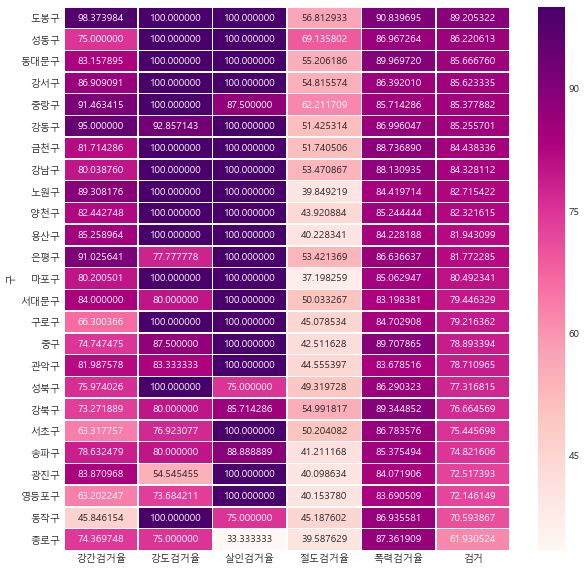

In [62]:
target_col=['강간검거율','강도검거율','살인검거율','절도검거율','폭력검거율','검거']

crime_gu_norm_sort = crime_gu_norm.sort_values(by='검거', ascending=False)

plt.figure(figsize=(10,10))
sns.heatmap(crime_gu_norm_sort[target_col], annot=True,fmt='f', linewidths=.5, cmap='RdPu')
plt.show()



In [105]:
crime_gu_norm.to_csv('../data/03_crime_seoul_final.csv',sep=',', encoding='utf-8')
# 수정한 data csv파일로 저장

In [79]:
import folium #지도 시각화 모듈
m=folium.Map(location=[45.5236,-122.6750])#지역의 위도와 경도정보 입력 
m

In [80]:
m.save('../data/folium_map_save.html')
#지도화면 html파일로 저장

In [83]:
folium.Map(location=[45.5236,-122.6750], tiles='Stamen Toner', zoom_start=13)
#tiles-지도 표현 종류, zoom-start-보여지는 확대 비율, 다른 형태 지도는 강의자료 참고

In [88]:
my_map=folium.Map(location=[45.372,-121.6972], tiles='Stamen Terrain', zoom_start=12)

folium.Marker([45.3288,-121.6625], popup='<i>Mt. Hood Meadows<i>').add_to(my_map)
folium.Marker([45.3311,-121.7113], popup='<b>Mt. Hood Meadows<b>').add_to(my_map)
#지도에 위치표시 추가. <i> 기울림, <b> 굵게

my_map

In [96]:
state_data

,State,Unemployment
0,AL,7.1
1,AK,6.8
2,AZ,8.1
3,AR,7.2
4,CA,10.1
5,CO,7.7
6,CT,8.4
7,DE,7.1
8,FL,8.2
9,GA,8.8


In [ ]:
#Json : 자바스크립트에서 만들어진 데이터 표현방식
# 파일의 형태를 미리 약속해 놓은 것
# 쉽게 파일을 dict, list 형태로, 또 dict, list 형태를 파일로 바꿀 수 있는 유용한 포맷

In [84]:
import json

state_data=pd.read_csv('../data/03_US_Unemployment_Oct2012.csv')

m = folium.Map(location=[48,-102], zoom_start=3)
m.choropleth(geo_data='../data/03_us-states.json', data=state_data, #choropleth: 지역 경계를 그리겠다.경계자료를 정리한 Json파일 참조
             columns=['State','Unemployment'], # 미국 주별 실업률 관련 data
             key_on='feature.id', 
             fill_color='YlGn', 
             fill_opacity=0.7, # 채우기 색 진하기 
             line_opacity=0.3, # 경계선 진하기
             legend_name='unimployment Rate(%)') # 범례 명명
m

In [104]:
import json

customer={'id':'0.00001','name':'홍길동','history':[{'date':'2018-05-22','log':True}, {'date':'2018-05-23','log':False'}, ] }

SyntaxError: EOL while scanning string literal (<ipython-input-104-85ea3c8aef79>, line 3)

In [85]:
import json
crime_gu_norm=pd.read_csv('../data/03_crime_seoul_final.csv', index_col=0, encoding='UTF-8')
geo_path='../data/03_skorea_municipalities_geo_simple.json'
geo_str=json.load(open(geo_path, encoding='utf-8'))

crime_gu_norm.head()

,살인,강도,강간,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,범죄,검거
구,,,,,,,,,,,,,
강남구,0.384615,1.000000,1.000000,1.000000,1.000000,80.038760,100.000000,100.000000,53.470867,88.130935,565731,0.876923,84.328112
강동구,0.307692,0.358974,0.310078,0.488988,0.632184,95.000000,92.857143,100.000000,51.425314,86.996047,446760,0.419583,85.255701
강북구,0.538462,0.128205,0.420543,0.340675,0.694153,73.271889,80.000000,85.714286,54.991817,89.344852,329042,0.424407,76.664569
강서구,0.692308,0.256410,0.532946,0.544187,0.800600,86.909091,100.000000,100.000000,54.815574,86.392010,607877,0.565290,85.623335
관악구,0.461538,0.307692,0.624031,0.586284,0.808346,81.987578,83.333333,100.000000,44.555397,83.678516,522849,0.557578,78.710965


In [110]:
my_map=folium.Map(location=[37.5502,126.982], zoom_start=11, tiles='Stamen Toner') # 서울의 위도와 경도 입력하여 지도 시각화
my_map.choropleth(geo_data=geo_str, data=crime_gu_norm['살인'], #지도 경계 data는 geo_str, crime_gu_norm의 살인 data 이용
                 columns=[crime_gu_norm.index, crime_gu_norm['살인']], # 구별 살인발생 data
                 fill_color='PuRd', key_on='feature.id',
                 fill_opacity=0.7, line_opacity=0.2,
                 legend_name='정규화된 살인 발생 건수')
my_map

In [91]:
col=['살인검거','강도검거','강간검거','절도검거','폭력검거']

crime_station_simple=crime_station[col] # crime_station_simple변수에 crime_station 중 검거에 대한 column data 저장
crime_station_simple.head()

,살인검거,강도검거,강간검거,절도검거,폭력검거
구분,,,,,
강남,3.0,26.0,269.0,1129.0,2096.0
강동,5.0,13.0,152.0,902.0,2201.0
강북,6.0,4.0,159.0,672.0,2482.0
강서,10.0,10.0,239.0,1070.0,2768.0
관악,7.0,10.0,264.0,937.0,2707.0


In [92]:
crime_station_simple=crime_station_simple/crime_station_simple.max()
#crime_station_simple을 각 columns의 최대값으로 나누기 
crime_station_simple['검거']=crime_station_simple.mean(axis=1)
#crime_station_simple dataframe에 검거 열을 만들고 구별 검거 평균값을 저장(행방향 계산)
crime_station_simple.head()

,살인검거,강도검거,강간검거,절도검거,폭력검거,검거
구분,,,,,,
강남,0.230769,1.000000,0.840625,1.000000,0.697040,0.753687
강동,0.384615,0.500000,0.475000,0.798937,0.731959,0.578102
강북,0.461538,0.153846,0.496875,0.595217,0.825407,0.506577
강서,0.769231,0.384615,0.746875,0.947741,0.920519,0.753796
관악,0.538462,0.384615,0.825000,0.829938,0.900233,0.695650


In [93]:
col = ['lat','lng']
crime_station_simple[col]=crime_station[col] #경도, 위도 정보 dataframe에 추가
crime_station_simple.head()

,살인검거,강도검거,강간검거,절도검거,폭력검거,검거,lat,lng
구분,,,,,,,,
강남,0.230769,1.000000,0.840625,1.000000,0.697040,0.753687,37.509435,127.066958
강동,0.384615,0.500000,0.475000,0.798937,0.731959,0.578102,37.528511,127.126822
강북,0.461538,0.153846,0.496875,0.595217,0.825407,0.506577,37.637304,127.027340
강서,0.769231,0.384615,0.746875,0.947741,0.920519,0.753796,37.539783,126.829997
관악,0.538462,0.384615,0.825000,0.829938,0.900233,0.695650,37.474379,126.950975


In [94]:
my_map=folium.Map(location=[37.5502,126.982], zoom_start=11)

for idx, rows in crime_station_simple.iterrows(): 
    #iterow함수(행을 반복해서 호출), idx(인덱스값), rows(행) / index값과 행 정보 반복해서 입력
    folium.Marker([rows['lat'], rows['lng']]).add_to(my_map)
    #지도에 마크 표시를 하는데 지역별 위도 경도 정보를 받아서 지도에 추가
my_map

In [96]:
my_map=folium.Map(location=[37.5502,126.982], zoom_start=11)

for idx, rows in crime_station_simple.iterrows():
    folium.CircleMarker([rows['lat'], rows['lng']], #원형 마크 표시 
                  radius = rows['검거']*50, #radius 원형 마크의 크기
                  popup = idx+' : '+ '%.2f' %rows['검거'], # 마크 표시를 누르면 경찰서별 검거율에 대한 정보 소수점 둘째자리까지 표시 
                  color = '#3186cc', fill=True, # color는 원테두리 색, fill은 원안 채우기 
                  fill_color = '3186cc').add_to(my_map)
my_map

In [97]:
#검거정보와 범죄정보 같이 그리기

my_map=folium.Map(location=[37.5502,126.982], zoom_start=11)

my_map.choropleth(geo_data=geo_str, data=crime_gu_norm['범죄'],
                 columns=[crime_gu_norm.index, crime_gu_norm['범죄']],
                 fill_color='PuRd', key_on='feature.id',
                 fill_opacity=0.7, line_opacity=0.2,
                 legend_name='정규화된 범죄')

for idx, rows in crime_station_simple.iterrows():
    folium.CircleMarker([rows['lat'], rows['lng']],
                  radius = rows['검거']*50,
                  popup = idx+' : '+ '%.2f' %rows['검거'],
                  color = '#3186cc', fill=True,
                  fill_color = '3186cc').add_to(my_map)
my_map

In [98]:
import pandas as pd

crime_loc_raw=pd.read_csv('../data/02_Crime_data_by_loc.csv', # csv파일 불러오기
                         thousands=',', encoding='euc-kr')
crime_loc_raw.head()

,범죄명,장소,발생건수
0,살인,"아파트, 연립 다세대",12
1,살인,단독주택,30
2,살인,노상,22
3,살인,상점,1
4,살인,"숙박업소, 목욕탕",4


In [99]:
crime_loc_raw['범죄명'].unique()
# 범죄명 열의 내용 검사

array(['살인', '강도', '강간.추행', '절도', '폭력'], dtype=object)

In [100]:
crime_loc_raw['장소'].unique()

array(['아파트, 연립 다세대', '단독주택', '노상', '상점', '숙박업소, 목욕탕', '유흥 접객업소', '사무실',
       '역, 대합실', '교통수단', '유원지 ', '학교', '금융기관', '기타'], dtype=object)

In [102]:
import numpy as np

crime_loc = crime_loc_raw.pivot_table(crime_loc_raw, index=['장소'], columns=['범죄명'], aggfunc=[np.sum])
# 불러온 dataframe을 장소와 범죄명에 따른 발생빈도 합계로 정렬하여 crime_loc변수로 저장
crime_loc

sum                      
             발생건수                      
범죄명         강간.추행  강도  살인     절도     폭력
장소                                     
교통수단          691   0   0    457    222
금융기관            2   1   1   1081     42
기타           2128  67  65  21734  26382
노상            986  87  22   9329  24535
단독주택          395  15  30   2241   3579
사무실           132   8   1    682   1229
상점             95  34   1   4403    852
숙박업소, 목욕탕     389   9   4    828    303
아파트, 연립 다세대   284  18  12   1504   2839
역, 대합실        181   0   0    356    272
유원지            59   2   2    367    424
유흥 접객업소       398  13   8   2035   2645
학교             33   0   0    400    203

In [103]:
crime_loc.columns=crime_loc.columns.droplevel([0,1]) #멀티 sum, 발생건수 index제거
crime_loc.head()

범죄명,강간.추행,강도,살인,절도,폭력
장소,,,,,
교통수단,691,0,0,457,222
금융기관,2,1,1,1081,42
기타,2128,67,65,21734,26382
노상,986,87,22,9329,24535
단독주택,395,15,30,2241,3579


In [104]:
# 각 열의 최대값으로 빈도를 나눠 정규화
col=['살인','강도','강간','절도','폭력']
crime_loc_norm=crime_loc/crime_loc.max()
crime_loc_norm.head()

범죄명,강간.추행,강도,살인,절도,폭력
장소,,,,,
교통수단,0.324718,0.000000,0.000000,0.021027,0.008415
금융기관,0.000940,0.011494,0.015385,0.049738,0.001592
기타,1.000000,0.770115,1.000000,1.000000,1.000000
노상,0.463346,1.000000,0.338462,0.429235,0.929990
단독주택,0.185620,0.172414,0.461538,0.103110,0.135661


In [135]:
crime_loc_norm['종합']=np.mean(crime_loc_norm, axis=1)
#crime_loc_norm dataframe에 종합 열을 만들고 수단별 범죄의 평균을 저장
crime_loc_norm.head()

범죄명,강간.추행,강도,살인,절도,폭력,종합
장소,,,,,,
교통수단,0.324718,0.000000,0.000000,0.021027,0.008415,0.070832
금융기관,0.000940,0.011494,0.015385,0.049738,0.001592,0.015830
기타,1.000000,0.770115,1.000000,1.000000,1.000000,0.954023
노상,0.463346,1.000000,0.338462,0.429235,0.929990,0.632207
단독주택,0.185620,0.172414,0.461538,0.103110,0.135661,0.211669


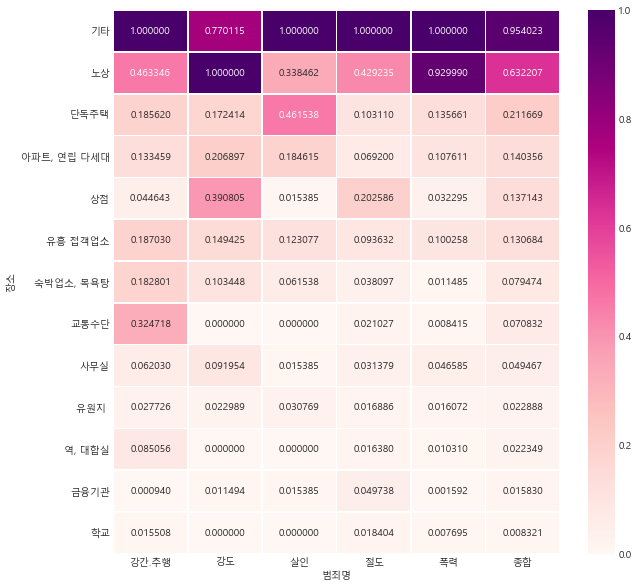

In [137]:
#장소와 범죄에 대해 히트맵 시각화

crime_loc_norm_sort = crime_loc_norm.sort_values(by='종합', ascending=False)
# crime_loc_norm dataframe을 종합 열을 기준으로 내림차순 정렬

plt.figure(figsize=(10,10))
sns.heatmap(crime_loc_norm_sort, annot=True, fmt='f', linewidth=.5, cmap='RdPu')
plt.show()